In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nx = 9 #the number of inside corners in x
ny = 6 #the number of inside corners in y

# Read a sample image
fname = './camera_cal/calibration2.jpg'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw and display the corners
if ret == True:    
    plt.figure(figsize=(20,20))
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img);


In [2]:
import glob

images = glob.glob('./camera_cal/calibration*.jpg')

obj_points = []
img_points = []

objp = np.zeros((nx*ny, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

for fname in images:    
    img = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, append to object points and image points
    if ret == True:
        print(fname, ' Successful')
        obj_points.append(objp)
        img_points.append(corners)
    else:
        print(fname, ' Unsuccessful')


./camera_cal/calibration6.jpg  Successful
./camera_cal/calibration3.jpg  Successful
./camera_cal/calibration2.jpg  Successful
./camera_cal/calibration7.jpg  Successful
./camera_cal/calibration16.jpg  Successful
./camera_cal/calibration5.jpg  Unsuccessful
./camera_cal/calibration9.jpg  Successful
./camera_cal/calibration1.jpg  Unsuccessful
./camera_cal/calibration11.jpg  Successful
./camera_cal/calibration10.jpg  Successful
./camera_cal/calibration8.jpg  Successful
./camera_cal/calibration4.jpg  Unsuccessful
./camera_cal/calibration12.jpg  Successful
./camera_cal/calibration19.jpg  Successful
./camera_cal/calibration20.jpg  Successful
./camera_cal/calibration14.jpg  Successful
./camera_cal/calibration13.jpg  Successful
./camera_cal/calibration15.jpg  Successful
./camera_cal/calibration18.jpg  Successful
./camera_cal/calibration17.jpg  Successful


In [3]:
# Camera calibration, given object points, image points, and the shape of the grayscale image:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

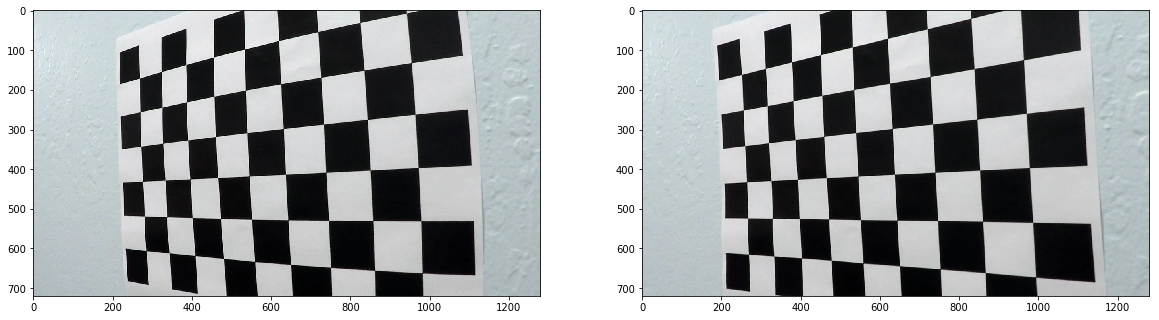

In [4]:
# Testing on an image that wasn't used for calibration
fname = './camera_cal/calibration4.jpg'
img = cv2.imread(fname)
undistorted_img = cv2.undistort(img, mtx, dist, None, mtx)

plt.figure(figsize=(20,20));
plt.subplot(1,2,1)
plt.imshow(img);
plt.subplot(1,2,2)
plt.imshow(undistorted_img);

In [5]:
# Saving precalculated calibration matrices to file
import pickle

calibration_mat = {"mtx": mtx,
                   "dist": dist}

pickle_out = open("calibration_mat.pickle","wb")
pickle.dump(calibration_mat, pickle_out)
pickle_out.close()

In [6]:
# loading saved matrices for testing
pickle_in = open("calibration_mat.pickle","rb")
calibration_mat_2 = pickle.load(pickle_in)

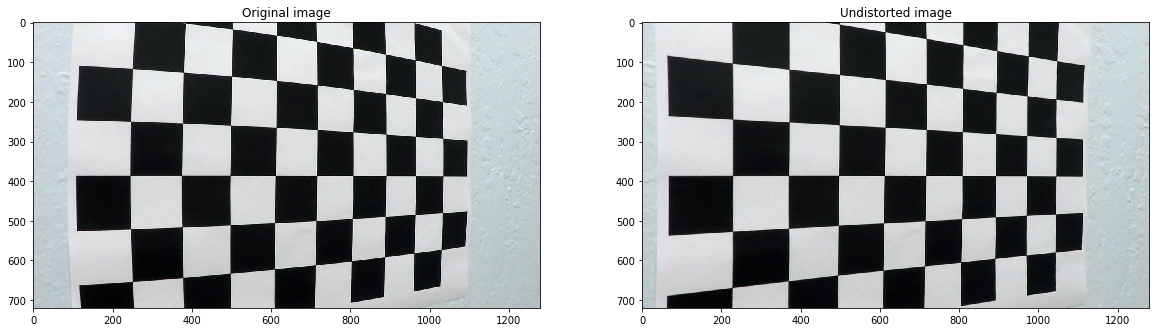

In [17]:
# Testing on an image that wasn't used for calibration
fname = './camera_cal/calibration5.jpg'
img = cv2.imread(fname)
undistorted_img = cv2.undistort(img, calibration_mat_2['mtx'], calibration_mat_2['dist'], None, calibration_mat_2['mtx'])

plt.figure(figsize=(20,20));
plt.subplot(1,2,1)
plt.imshow(img);
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(undistorted_img);
plt.title('Undistorted image')
plt.savefig('examples/undistorted_img_example.png', bbox_inches='tight')